<a href="https://colab.research.google.com/github/ashishar/data_science_codes/blob/main/python/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

In [1]:
#import kaggle dataset
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mdmahmudulhasansuzan/students-adaptability-level-in-online-education

! unzip students-adaptability-level-in-online-education.zip
!ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
students-adaptability-level-in-online-education.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  students-adaptability-level-in-online-education.zip
replace students_adaptability_level_online_education.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: students_adaptability_level_online_education.csv  
kaggle.json  students-adaptability-level-in-online-education.zip
sample_data  students_adaptability_level_online_education.csv


### **Import library**

In [2]:
from sklearn import datasets

### **Load dataset**

### **Import library**

In [3]:
import pandas as pd

### **Download CSV from GitHub**

### **Read in CSV file**

In [4]:
Student_adaptivity = pd.read_csv("students_adaptability_level_online_education.csv")
Student_adaptivity

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [5]:
print(Student_adaptivity.columns, Student_adaptivity.shape)


Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object') (1205, 14)


In [6]:
Student_adaptivity.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


**Dummy encoding of categorical features**


**Dummy variable**

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
d = encoder.fit_transform(Student_adaptivity)

encoded_df = pd.DataFrame(d, columns=list(Student_adaptivity.columns))
encoded_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [8]:
X=encoded_df.drop(['Adaptivity Level'],axis=1)
y=encoded_df[['Adaptivity Level']]

**Split dataset to X and Y variables** 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**Define the model**

In [10]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42,multi_class='multinomial',solver='lbfgs', max_iter=500,penalty='l2',warm_start=True)

**Fit on the training set**


In [11]:
model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   warm_start=True)

In [12]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': True}

**Predict on test set part**


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.76      0.33      0.46        39
         1.0       0.74      0.60      0.66       154
         2.0       0.63      0.82      0.71       169

    accuracy                           0.67       362
   macro avg       0.71      0.58      0.61       362
weighted avg       0.69      0.67      0.66       362



**Evaluate predictions**


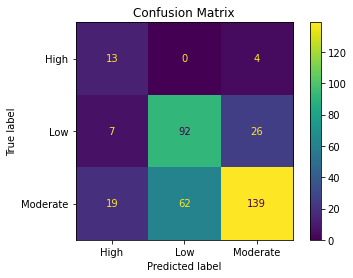

In [14]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

**Scatter plots**

In [15]:
import seaborn as sns

Make scatter plot

The Data

In [16]:
y_test

,Adaptivity Level
101,2.0
946,2.0
306,2.0
109,0.0
1061,2.0
...,...
787,2.0
966,1.0
560,0.0
790,1.0


In [17]:
y_pred

array([2., 2., 2., 1., 2., 0., 2., 2., 2., 1., 0., 1., 2., 2., 1., 2., 2.,
       2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 0., 2., 2., 1., 2., 1., 2.,
       2., 1., 2., 2., 2., 1., 1., 0., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 1., 2., 2., 1., 2., 2., 0., 2., 2., 2., 1., 1., 2., 2.,
       2., 1., 1., 2., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
       1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 0., 2., 1.,
       2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
       0., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
       2., 2., 2., 2., 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


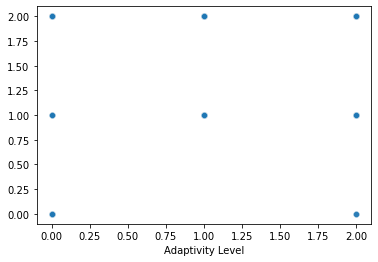

In [18]:
sns.scatterplot(y_test['Adaptivity Level'], y_pred, alpha=0.5)